<a href="https://colab.research.google.com/github/yohanesnuwara/reportminer/blob/main/ReportMiner_for_PDF_PPT_XLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ReportMiner

Using ReportMiner on Google Colab. ReportMiner is an easy-to-use wrapper for multimodal retrieval augmented generation (RAG) tasks for technical reports. It works even for PDFs, Excel spreadsheets, and Presentations.

Here we will use ColPali-1.2 as our embedding model and SmolVLM as our visual language model to perform RAG on multiple reports, not just one report. Note you need a High-Memory RAM option on Colab Pro and GPU T4

In [2]:
# Install full package for excel and ppt support
%pip install '/home/reportminer-1/.[xls,ppt]'


Processing /home/reportminer-1
  Preparing metadata (setup.py) ... done
  Created wheel for ReportMiner: filename=ReportMiner-0.2.3-py3-none-any.whl size=10795 sha256=a2f509bd2c0a719c573e5c298b7040e5e962068f2a9f5fd22aabc65229eef159
  Stored in directory: /root/.cache/pip/wheels/f4/48/2b/d7437c5a08aa74ccc1f102c7ccae5de43eb6de4cc31093545c
Successfully built ReportMiner
  Attempting uninstall: ReportMiner
    Found existing installation: ReportMiner 0.2.3
    Uninstalling ReportMiner-0.2.3:
      Successfully uninstalled ReportMiner-0.2.3

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from reportminer import rag, rag_folder

Here, we use ColPali and Smol to setup our RAG models

In [4]:
# Setup models
rag_models = rag.setup_model()

Selected embedding model: vidore/colpali-v1.2
Selected visual language model: HuggingFaceTB/SmolVLM-Instruct
Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some kwargs in processor config are unused and will not have any effect: image_seq_len. 


Upload a folder that consists of PDF, Excel, and PPT files. It will create `saved_images` folder containing images converted from these files, and `pdf_copy` containing the PDFs converted from Excel and PPT. Then we take the latter folder to run our RAG.

In [8]:
# Renaming imported files
import os
import glob
import shutil

# Specify the base directory where the files are currently stored
base_dir = "/home/reportminer-1/reports"  # Change this to the correct base directory
destination_dir = "/home/reportminer-1/reports"  # Change to your desired destination

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Get all files recursively
for file_path in glob.glob(base_dir + "/**", recursive=True):
    if os.path.isfile(file_path):
        # Extract only the filename (remove incorrect backslashes and folders)
        filename = os.path.basename(file_path.replace("\\", "/"))
        
        # Define the new path for the file
        new_path = os.path.join(destination_dir, filename)
        
        # Move and rename the file
        shutil.move(file_path, new_path)
        print(f"Renamed: {file_path} -> {new_path}")

print("Renaming completed.")

Renamed: /home/reportminer-1/reports/Enc2 Poseidon1ADN struc sum.pdf -> /home/reportminer-1/reports/Enc2 Poseidon1ADN struc sum.pdf
Renamed: /home/reportminer-1/reports/Enc3 Poseidon1ADN dip analysi...pdf -> /home/reportminer-1/reports/Enc3 Poseidon1ADN dip analysi...pdf
Renamed: /home/reportminer-1/reports/Enc4 Poseidon1ADN sed summary...pdf -> /home/reportminer-1/reports/Enc4 Poseidon1ADN sed summary...pdf
Renamed: /home/reportminer-1/reports/Enc5 Poseidon1ADN sed vector.pdf -> /home/reportminer-1/reports/Enc5 Poseidon1ADN sed vector.pdf
Renamed: /home/reportminer-1/reports/Poseidon1 ADN run8deep dyn.dlis -> /home/reportminer-1/reports/Poseidon1 ADN run8deep dyn.dlis
Renamed: /home/reportminer-1/reports/Poseidon1 ADN run8deep sta.dlis -> /home/reportminer-1/reports/Poseidon1 ADN run8deep sta.dlis
Renamed: /home/reportminer-1/reports/Poseidon1 ADN run8med dyn.dlis -> /home/reportminer-1/reports/Poseidon1 ADN run8med dyn.dlis
Renamed: /home/reportminer-1/reports/Poseidon1 ADN run8med s

In [6]:
# Specify folder that contain pdf
root_directory = '/home/reportminer-1/reports'

In [9]:
# Indexing all PDF, PPT, and Excel in the directory
rag_models = rag_folder.Process(root_directory, rag_models)


Images for 'Enc2 Poseidon1ADN struc sum.pdf' have been saved in folder: /home/reportminer-1/saved_images/Enc2 Poseidon1ADN struc sum
Images for 'Enc3 Poseidon1ADN dip analysi...pdf' have been saved in folder: /home/reportminer-1/saved_images/Enc3 Poseidon1ADN dip analysi..
Images for 'Enc4 Poseidon1ADN sed summary...pdf' have been saved in folder: /home/reportminer-1/saved_images/Enc4 Poseidon1ADN sed summary..
Images for 'Enc5 Poseidon1ADN sed vector.pdf' have been saved in folder: /home/reportminer-1/saved_images/Enc5 Poseidon1ADN sed vector
Images for 'Enclosure 1_P1_final_comp_log.pdf' have been saved in folder: /home/reportminer-1/saved_images/Enclosure 1_P1_final_comp_log
Images for 'Enclosure 2_P1_petrophysical_comp_log.pdf' have been saved in folder: /home/reportminer-1/saved_images/Enclosure 2_P1_petrophysical_comp_log
Images for 'DRIMS-#8236245-v1-Sequence_Stratigraphy_-_Rock_typing_-_Browse_-_Poseidon-1_FINAL_rock_typing_rep.pdf' have been saved in folder: /home/reportminer-

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (100444051 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Added page 1 of document 7 to index.
Added page 2 of document 7 to index.
Index exported to .byaldi/rag
Indexing file: /home/reportminer-1/pdf_copy/Poseidon1_BasicData_Appendix1_BiostratSampleSummary.pdf
Added page 1 of document 8 to index.
Added page 2 of document 8 to index.
Added page 3 of document 8 to index.
Added page 4 of document 8 to index.
Index exported to .byaldi/rag
Indexing file: /home/reportminer-1/pdf_copy/Poseidon1_Basicdata_Micropal_Report.pdf
Added page 1 of document 9 to index.
Added page 2 of document 9 to index.
Added page 3 of document 9 to index.
Added page 4 of document 9 to index.
Added page 5 of document 9 to index.
Added page 6 of document 9 to index.
Added page 7 of document 9 to index.
Added page 8 of document 9 to index.
Added page 9 of document 9 to index.
Added page 10 of document 9 to index.
Added page 11 of document 9 to index.
Index exported to .byaldi/rag
Indexing file: /home/reportminer-1/pdf_copy/Poseidon_1_Paly_ Interp_Report.pdf
Added page 1 of 

After indexing, you can retrieve relevant pages using the `RAG` function

Report Name /home/reportminer-1/pdf_copy/CoP_Poseidon-1_MDT Level-0 Report.pdf, Page 6 with Relevancy score 13.625


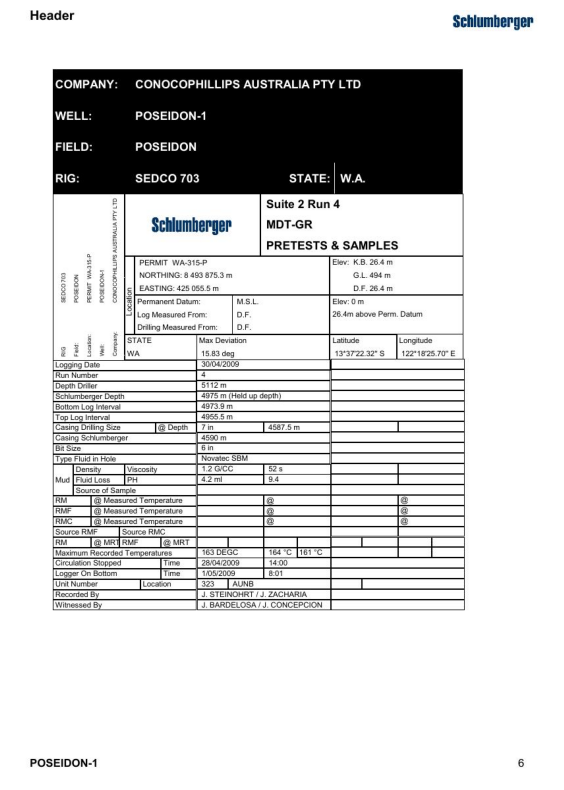



Report Name /home/reportminer-1/pdf_copy/Poseidon_1_WCR_Volume_2_Interpretive_Data.pdf, Page 215 with Relevancy score 12.25


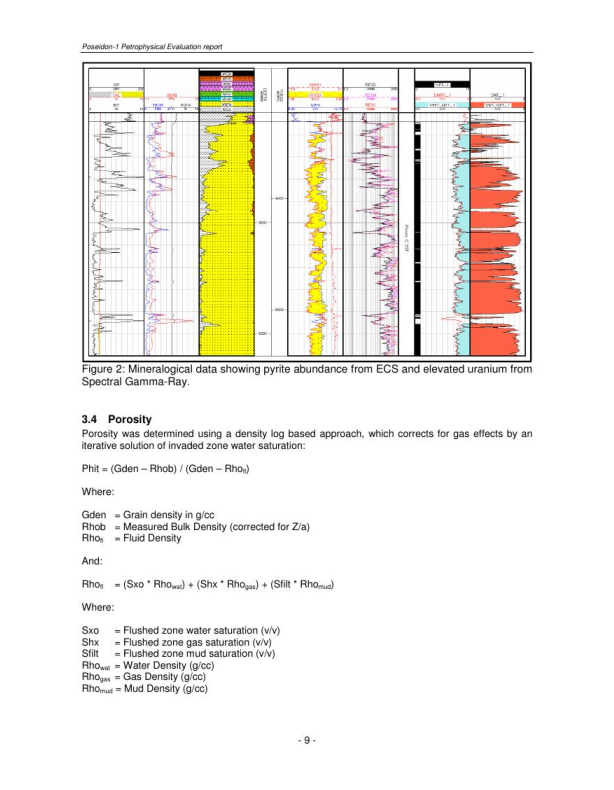



Report Name /home/reportminer-1/pdf_copy/Poseidon_1_WCR_Volume_2_Interpretive_Data.pdf, Page 216 with Relevancy score 11.875


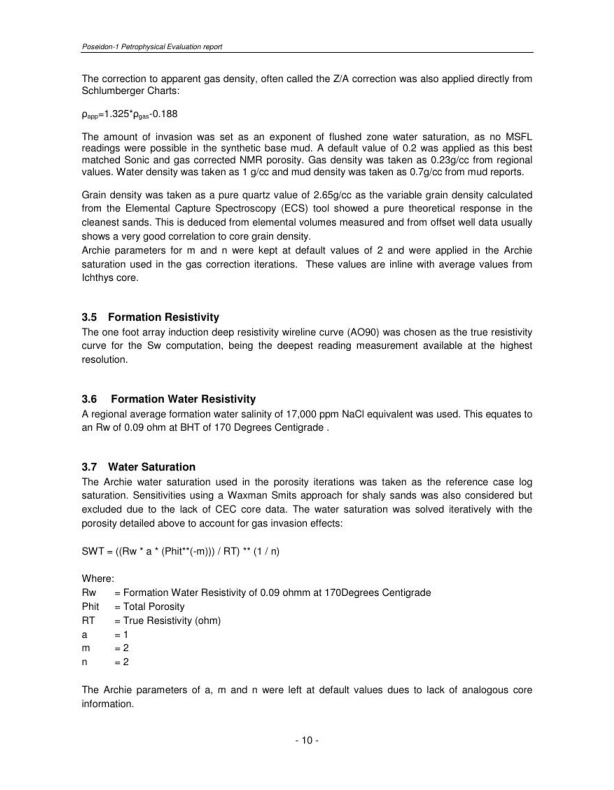

In [10]:
# # This query return spreadsheet file
rag_folder.RAG('what is the initial fluid saturation at leakoff vs time?', rag_models, k=3)

And you can ask the documents directly using `Ask` function

Note it will return list of 3 elements

1st element is the answer

2nd element is another list consist of file path of the relevant report, the page of that report, and similarity score

3rd element is a PIL object. You can use Matplotlib to display the page.

In [12]:
rag_folder.Ask('what is the initial fluid saturation at leakoff vs time analysis?', rag_models)


(' The initial fluid saturation at leakoff vs time analysis is 100%.',
 ['/home/reportminer-1/pdf_copy/CoP_Poseidon-1_MDT Level-0 Report.pdf',
  6,
  13.75],
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=827x1170>)

In [13]:
rag_folder.Ask('describe about intragranular porosity seen in the sample.', rag_models)


(' The intragranular porosity reflects the remnant intergranular pore system and the second peak at much smaller apertures, which is commonly clay related.',
 ['/home/reportminer-1/pdf_copy/Poseidon_1_WCR_Volume_2_Interpretive_Data.pdf',
  99,
  14.5],
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=850x1100>)